# Company Name:INX Future Inc.

    INX Future Inc , (referred as INX ) , is a data analytics and automation solutions provider 
    with over 15 years of global business presence. 
    
    Recent years, the employee performance indexes are not healthy and this is becoming a growing 
    concerns among the top management. There has been increased escalations on service delivery and 
    client satisfaction levels came down by 8 percentage points. 
    
    Management decided to initiate a data science project , which analyses the current employee data and find 
    the core underlying causes of this performance issues. 
    
    * Dataset: Received from IABAC datasets.
    * Dataset Details:

            -1200 rows.
            - Total 28 Attributes(Columns).
            - Contains both Numerical and Categorical Columns and also Ordinal columns.
            -Name of Depts:
                •	Sales
                •	Human Resources
                •	Data Science
                •	Research & Development
                •	Finance
                •	Development
                
# Attributes:

        0   EmpNumber                     
        1   Age                           
        2   Gender                        
        3   EducationBackground           
        4   MaritalStatus                 
        5   EmpDepartment                 
        6   EmpJobRole                    
        7   BusinessTravelFrequency       
        8   DistanceFromHome              
        9   EmpEducationLevel             
        10  EmpEnvironmentSatisfaction    
        11  EmpHourlyRate                  
        12  EmpJobInvolvement              
        13  EmpJobLevel                    
        14  EmpJobSatisfaction             
        15  NumCompaniesWorked            
        16  OverTime                      
        17  EmpLastSalaryHikePercent      
        18  EmpRelationshipSatisfaction   
        19  TotalWorkExperienceInYears    
        20  TrainingTimesLastYear         
        21  EmpWorkLifeBalance             
        22  ExperienceYearsAtThisCompany  
        23  ExperienceYearsInCurrentRole  
        24  YearsSinceLastPromotion       
        25  YearsWithCurrManager          
        26  Attrition                     
        27  PerformanceRating

# OBJECTIVES:

            1. To build a model to predict Employee Performance by analysing factors affecting performance.
            2. Department wise performances.
            3. Top 3 Important Factors effecting employee performance.
            4. Recommendations to improve the employee performance based on insights from analysis.

# IMPORT ALL THE REQUIRED LIBRARIES:

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
from scipy import stats

# LOAD DATA:

In [2]:
# Load the data:
data = pd.read_excel(r"INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx")
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
# Use Transpose function to see all the columns horizontally:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
EmpNumber,E1001000,E1001006,E1001007,E1001009,E1001010,E1001011,E1001016,E1001019,E1001020,E1001021
Age,32,47,40,41,60,27,50,28,36,38
Gender,Male,Male,Male,Male,Male,Male,Male,Female,Female,Female
EducationBackground,Marketing,Marketing,Life Sciences,Human Resources,Marketing,Life Sciences,Marketing,Life Sciences,Life Sciences,Life Sciences
MaritalStatus,Single,Single,Married,Divorced,Single,Divorced,Married,Single,Married,Single
EmpDepartment,Sales,Sales,Sales,Human Resources,Sales,Development,Sales,Development,Development,Development
EmpJobRole,Sales Executive,Sales Executive,Sales Executive,Manager,Sales Executive,Developer,Sales Representative,Developer,Developer,Developer
BusinessTravelFrequency,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely
DistanceFromHome,10,14,5,10,16,10,8,1,8,1
EmpEducationLevel,3,4,4,4,4,2,4,2,3,3


In [4]:
# Check to see shape( Rows and Columns) of dataset:
data.shape

(1200, 28)

# CHECK THE DATA TYPES OF COLUMNS FOR NUMERICAL AND CATEGORICAL VALUES:

In [4]:
data.info()
# Dtype=object are Categorical columns.
# Dtyepe=Int64 are Numerical columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# CHECK FOR MISSING VALUES:

In [5]:
data.isnull().sum()
# No missing values found.

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# CHECK FOR ANY DUPLICATED VALUES:

In [6]:
data.duplicated().sum()
# No Duplicate values found.

np.int64(0)

# CONVERSION OF CATEGORICAL COLUMNS TO NUMERIC**

In [7]:
data.drop('EmpNumber', axis=1,inplace=True)

In [8]:
cat_cols=data.select_dtypes(include='object')

In [9]:
# These are the categorical coloumns:
cat_cols.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

In [10]:
# These are the numerical columns:
num_cols=data.select_dtypes(include='int64')
num_cols.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [11]:
# Two empty dictationaries are created to store encoder and label mapping:
encoder = {}
label_mappings = {}

In [12]:
# Transformation of categorical values to numerical, using label encoder:
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoder[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [13]:
# Display of Categorical columns and their label values assigned to them :
for col, mapping in label_mappings.items():
        print(f"Label mapping for '{col}': {mapping}")

Label mapping for 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}
Label mapping for 'EducationBackground': {'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}
Label mapping for 'MaritalStatus': {'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}
Label mapping for 'EmpDepartment': {'Data Science': np.int64(0), 'Development': np.int64(1), 'Finance': np.int64(2), 'Human Resources': np.int64(3), 'Research & Development': np.int64(4), 'Sales': np.int64(5)}
Label mapping for 'EmpJobRole': {'Business Analyst': np.int64(0), 'Data Scientist': np.int64(1), 'Delivery Manager': np.int64(2), 'Developer': np.int64(3), 'Finance Manager': np.int64(4), 'Healthcare Representative': np.int64(5), 'Human Resources': np.int64(6), 'Laboratory Technician': np.int64(7), 'Manager': np.int64(8), 'Manager R&D': np.int64(9), 'Manufacturing Director': np.int64(10), 'Researc

In [14]:
# Check whether the categorical values are converted ot not:
print(data['MaritalStatus'].head())

0    2
1    2
2    1
3    0
4    2
Name: MaritalStatus, dtype: int64


# Find Outliers and Handle them:
# Boxplots are used to identify the outliers in the data:

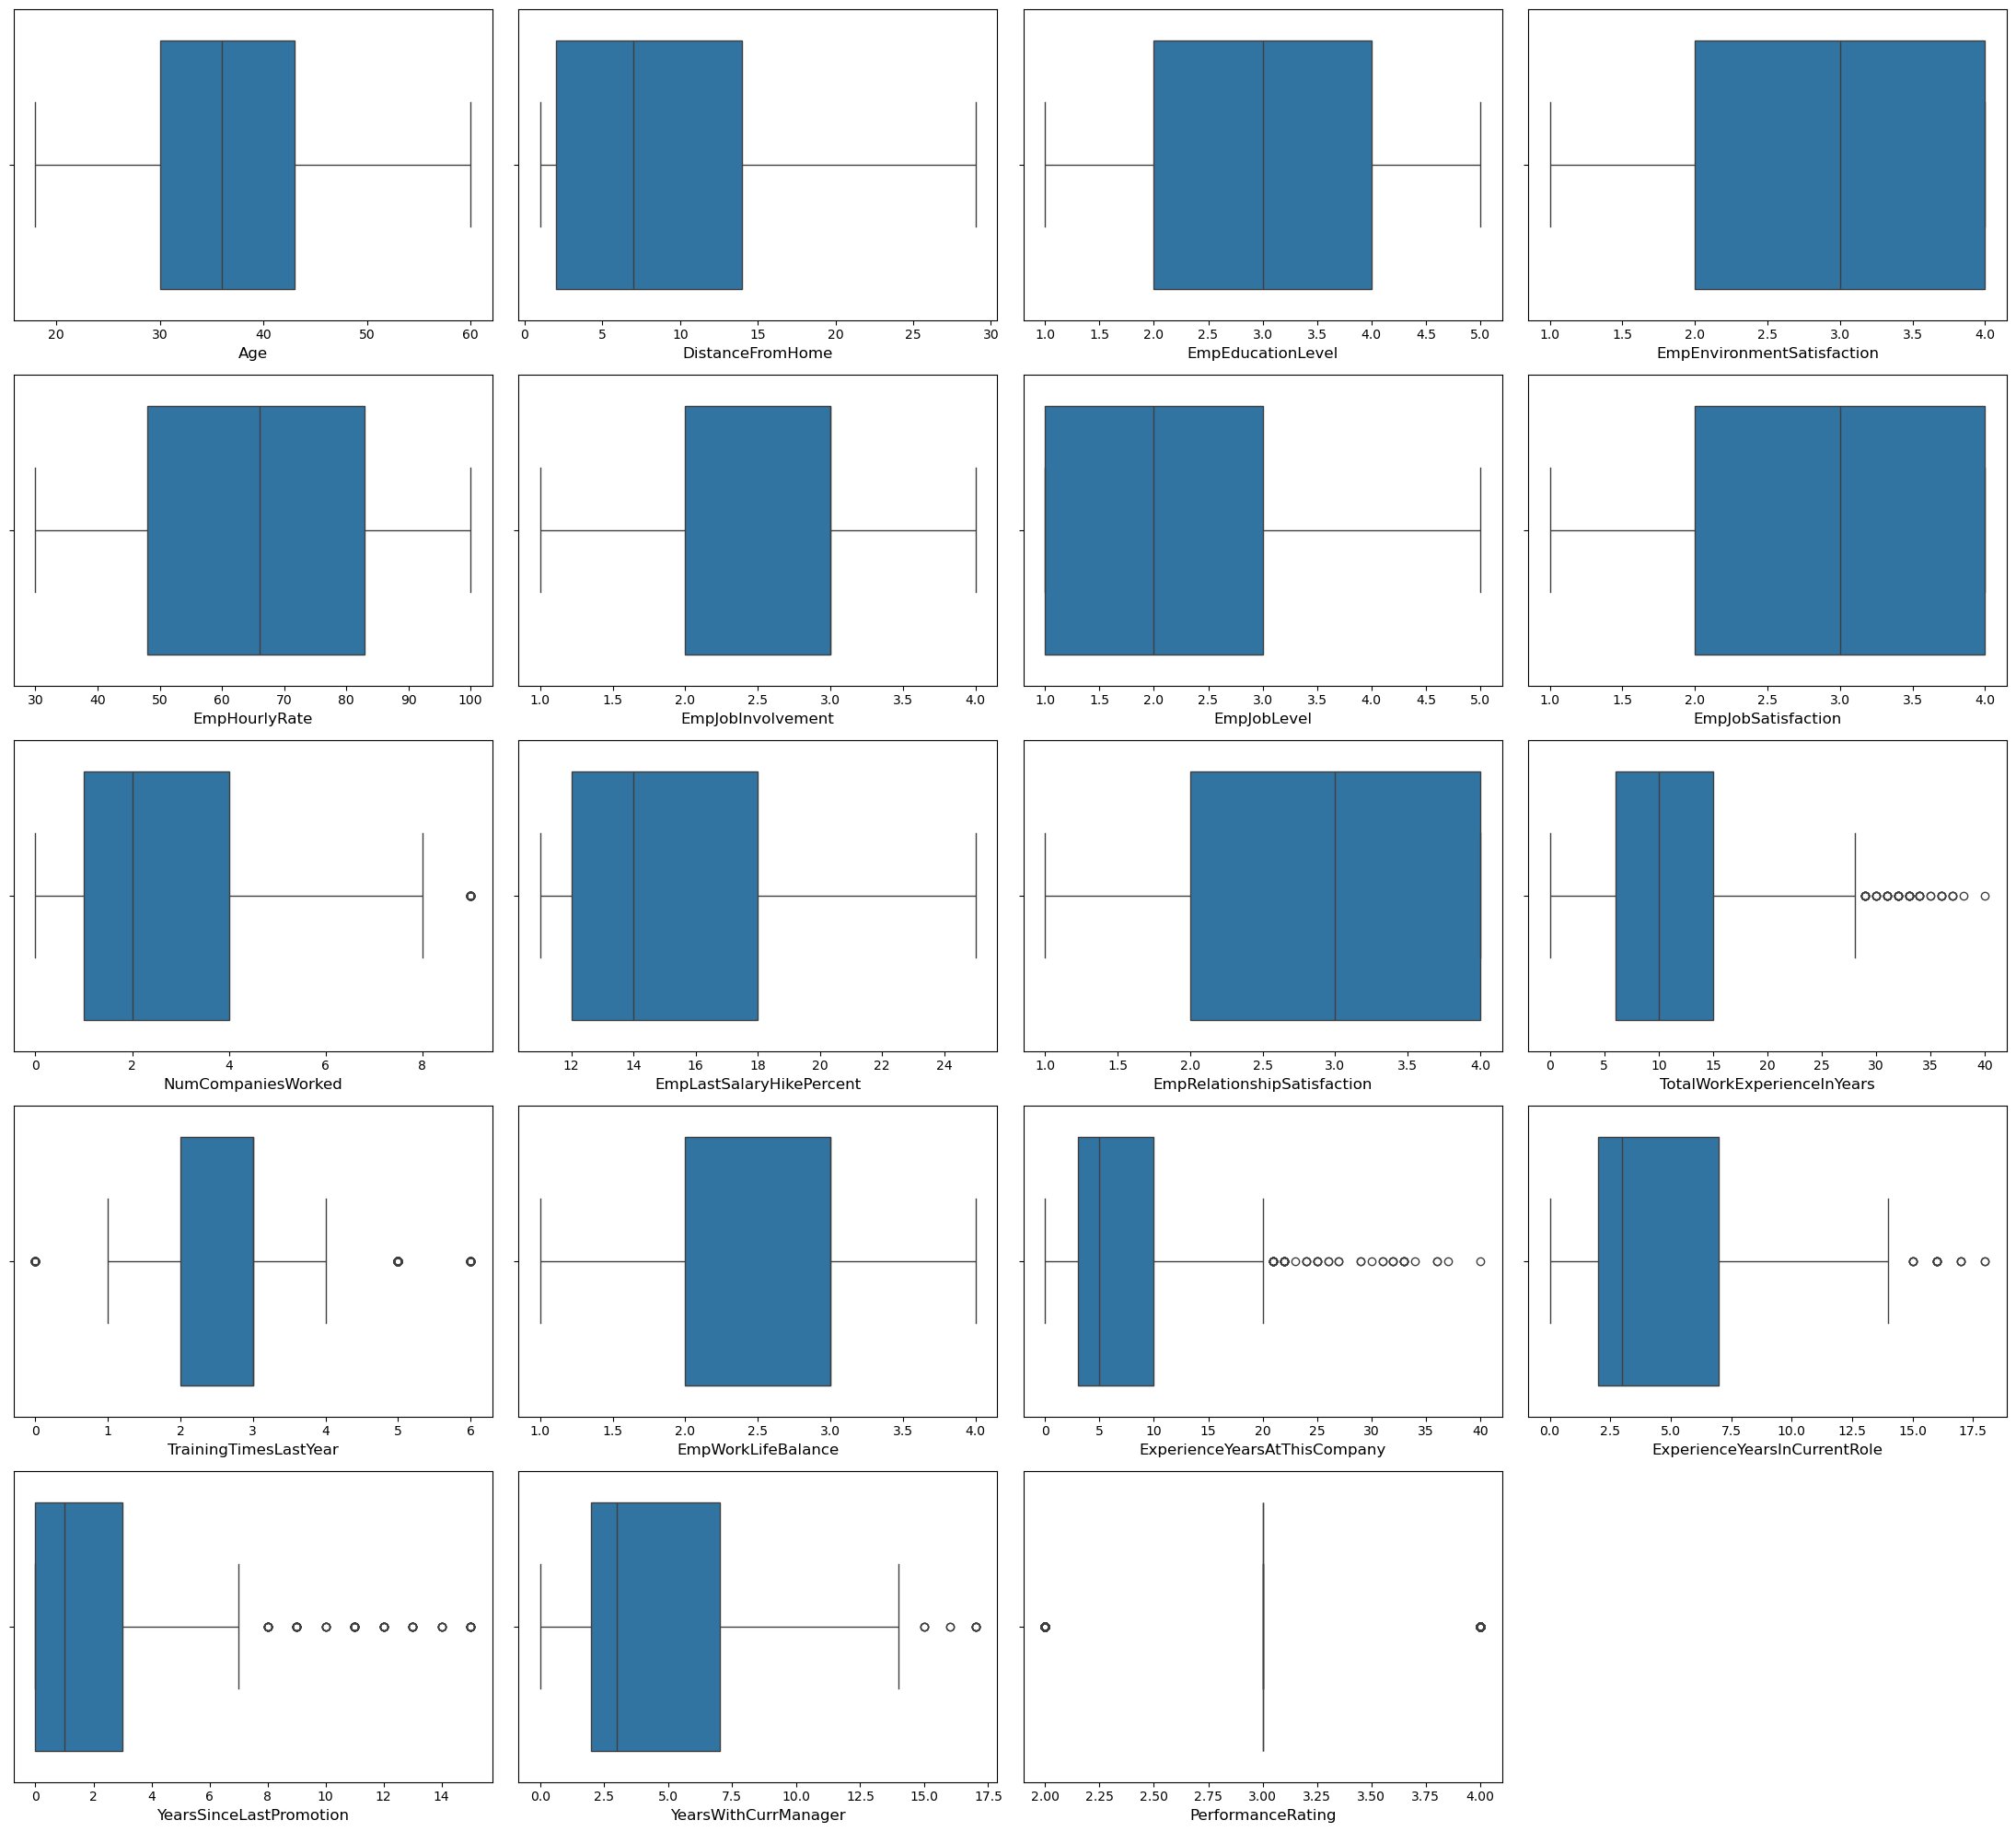

In [15]:
plt.figure(figsize=(22,20)) # Canvas size
plotnum = 1 # Counter
for column in num_cols:  # Iterarion of numerical columns.
    if plotnum < 20:  # set the limit to 20 since you have 20 columns
        plt.subplot(5, 4, plotnum)  # plotting 20 graphs (5 rows, 4 columns), plotnumber is for count
        sns.boxplot(x=num_cols[column])  # Plotting box plots to detect the outlier
        plt.xlabel(column, fontsize=12)  # assigning name to x-axis and reducing font size for better readability
    plotnum += 1  # counter increment

plt.tight_layout()
plt.show()
    

In [16]:
# Assigning outliers columns to a variable:
outl_cols = ['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                 'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
print(outl_cols)


['TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [17]:
# Creation of new dataframe for Outlier columns:
df1 = pd.DataFrame(data[outl_cols])
df1

,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10,2,10,7,0,8
1,20,2,7,7,1,7
2,20,2,18,13,1,12
3,23,2,21,6,12,6
4,10,1,2,2,2,2
...,...,...,...,...,...,...
1195,6,3,6,5,0,4
1196,4,2,1,0,0,0
1197,20,3,20,8,3,8
1198,9,3,8,7,7,7


# Check the distribution, to know Outlier imputation methods to be used to replace outliers:

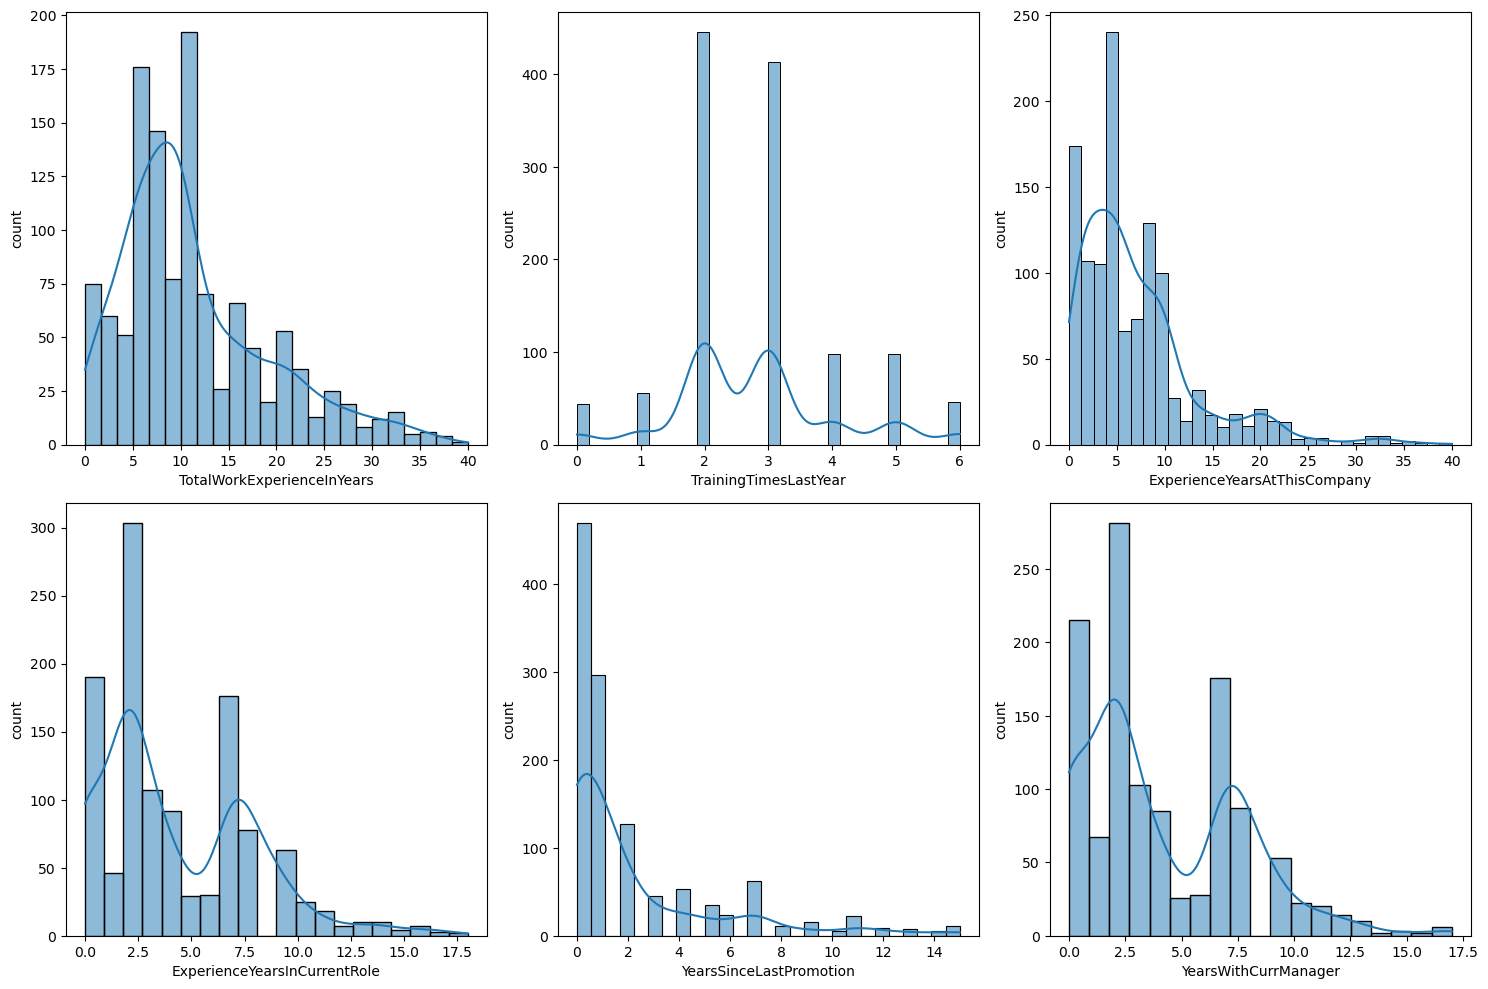

In [18]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber=1
for column in df1.columns:
    if plotnumber<=6:
        ax=plt.subplot(2,3, plotnumber)
        sns.histplot(df1[column],kde=True)
        plt.xlabel(column)
        plt.ylabel('count')
        plotnumber+=1
plt.tight_layout()
plt.show()

# None of the six Outlier columns are Normally Distributed, all of them are skewed,hence we use IQR method to replace outliers:

**(i)  Imputation of outliers for TotalWorkExperienceInYears column:**

In [19]:
# Import the stats library to calculate IQR:
iqr = stats.iqr(data['TotalWorkExperienceInYears'])
print("IQR:",iqr)

# Calculate Q1 and Q3:
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Calculate the maximum and minimum limit:
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [20]:
# Imputation with Median:
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [21]:
# Check whether imputation is done or not:
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**(iii)  Imputation of outliers for TrainingTimesLastYear column:**

In [22]:
iqr = stats.iqr(data['TrainingTimesLastYear'])
print("IQR:",iqr)

# Calculate Q1 & Q3:
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Calculate the maximum and minimum limit:
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [23]:
# Imputation with Median:
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [24]:
# Check whether imputation is done:
data.loc[data['TrainingTimesLastYear'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**(iii)  Imputation of outliers for ExperienceYearsAtThisCompany column:**

In [25]:
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'])
print("IQR:",iqr)

# Calculate Q1 & Q3:
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Calculate the maximum and minimum limit:
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [26]:
# Imputation with Median:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [27]:
# Check whether imputation is done:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**(iv)  Imputation of outliers for ExperienceYearsInCurrentRole column:**

In [28]:
# Import the stats library to calculate IQR:
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'])
print("IQR:",iqr)

# Calculate Q1 and Q3:
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Calculate the maximum and minimum limit:
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [29]:
# Imputation with Median:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole']=data['ExperienceYearsInCurrentRole'].median()

In [30]:
# Check whether imputation is done:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**(v)  Imputation of outliers for YearsSinceLastPromotion column:**

In [31]:
# Import the stats library to calculate IQR:
iqr = stats.iqr(data['YearsSinceLastPromotion'])
print("IQR:",iqr)

# Calculate Q1 and Q3:
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)
# Calculate the maximum and minimum limit:
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum Limit: 7.5


In [32]:
# Imputation with Median:
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [33]:
# Check whether imputation is done:
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**(vi)  Imputation of outliers for YearsWithCurrManager column:**

In [34]:
# Import the stats library to calculate IQR:
iqr = stats.iqr(data['YearsWithCurrManager'])
print("IQR:",iqr)

# Calculate Q1 and Q3:
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)
# Calculate the maximum and minimum limit:
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [35]:
# Imputation with Median:
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [36]:
# Check whether imputation is done:
data.loc[data['YearsWithCurrManager'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


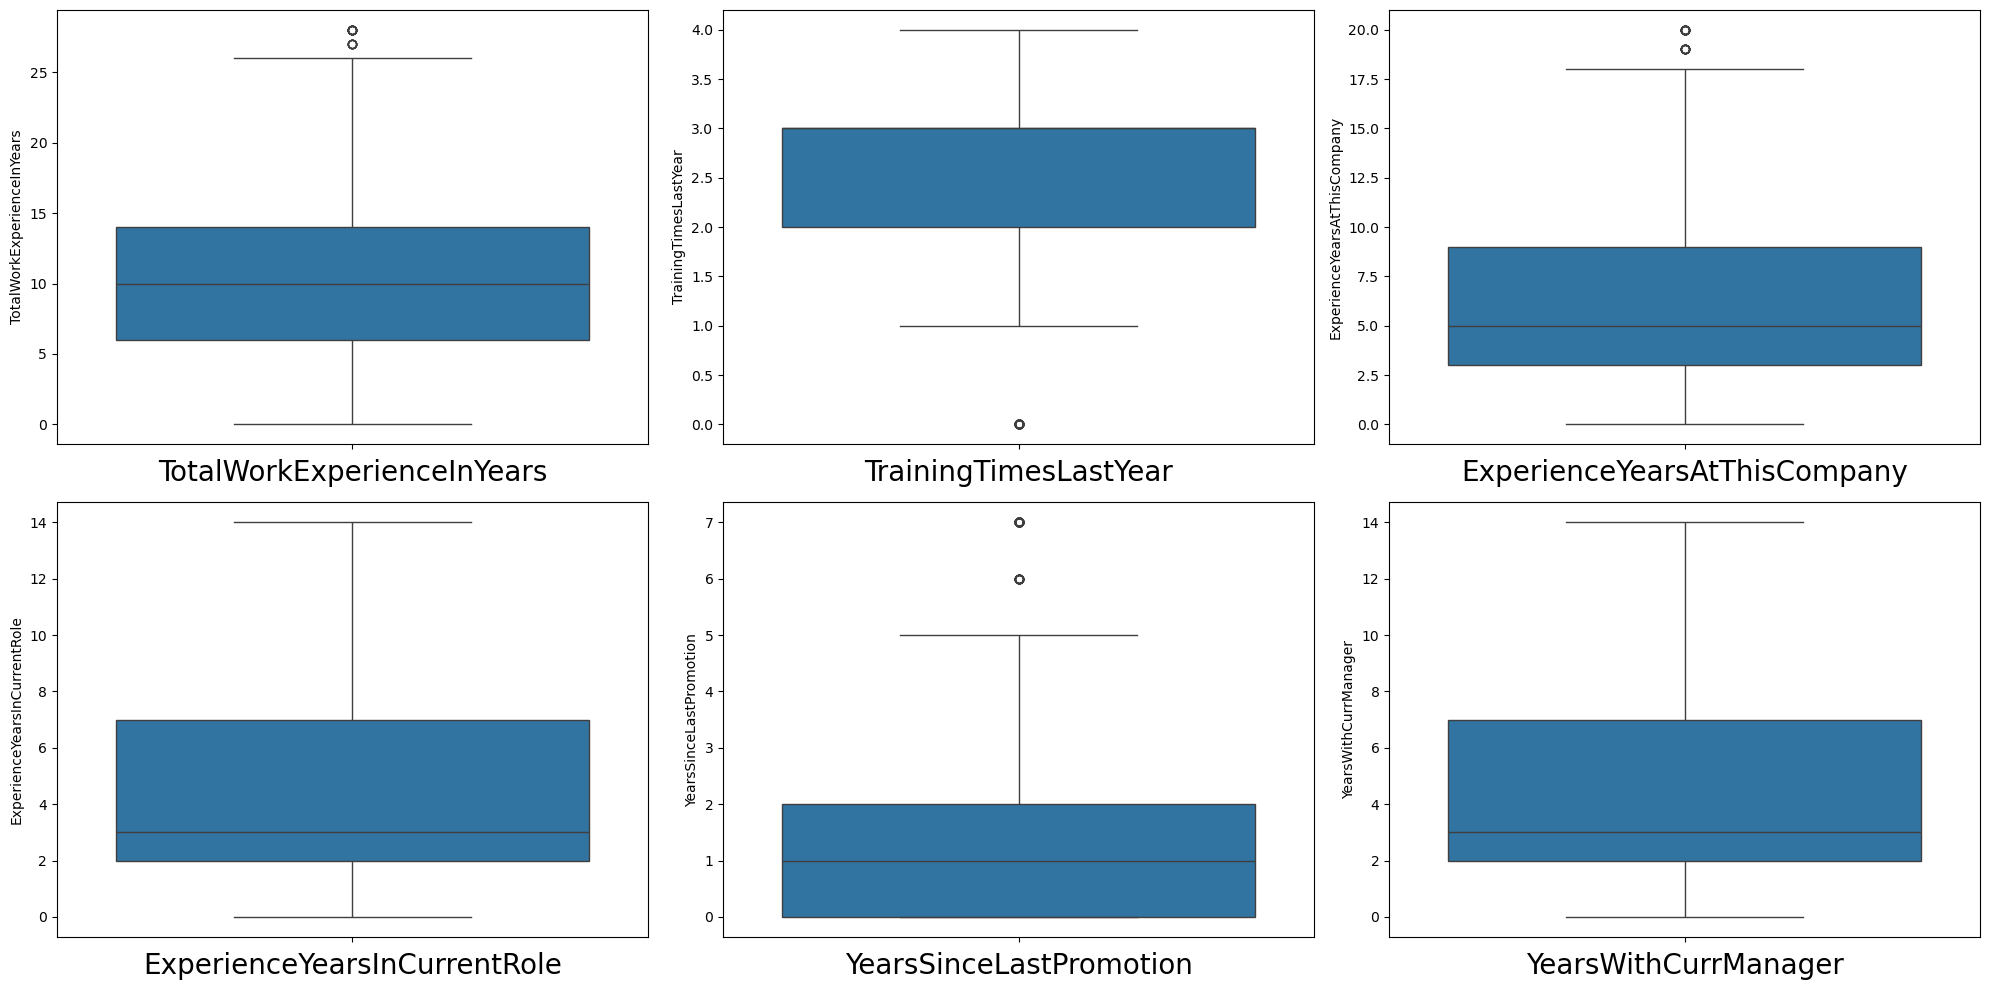

In [37]:
# Check outlier replacement has been done with a Boxplot:
outl_cols = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotnum = 1 # counter

for column in outl_cols: # iteration of columns / acessing the columns from count 
    if plotnum<7:    # set the limit
        plt.subplot(2,3,plotnum) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(outl_cols[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [38]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,5,6,1,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


**Target column is multiclass target with three classes as 2,3,4 and these have to be converted to 0,1,2 for Model Building.**

In [39]:
data['PerformanceRating'].unique()

array([3, 4, 2])

In [40]:
# Creation of dictionary to convert these values 0,1,2:
conversion_dict = {2: 0, 3: 1, 4: 2}

# using .map()
data['PerformanceRating'] = data['PerformanceRating'].map(conversion_dict)

In [41]:
data['PerformanceRating'].unique()

array([1, 2, 0])

**Now we need to export the data to excel as we have all the values as numeric for further processing.**

In [60]:
data.to_csv('D:\DATA SCIENCE\DATAMITES\PROJECTS\IABAC Project-Emp Performance Analysis\IABAC Project - INX Future Inc - Daniel Vijay Kumar\Encoded_Data.csv', index=False)

print("Data exported successfully to your_file_name.csv")

Data exported successfully to your_file_name.csv


**End of Notebook**